In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Carregar o dataset
file_path = './Datasets/20241016 Gym Members Exercise Dataset/gym_members_exercise_tracking.csv'
df = pd.read_csv(file_path)

In [8]:
# Selecionar colunas numéricas relevantes para o agrupamento
numeric_features = df[['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Fat_Percentage', 'BMI']]


In [9]:
# Padronizar os dados para melhorar a performance do agrupamento
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

In [10]:
# Definir número de clusters para teste inicial
k_values = [2, 3, 4, 5]
cluster_results = {}

In [11]:
# Realizar o agrupamento K-Means com diferentes valores de k e calcular os critérios de validação
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(scaled_features)
    
    # Calcular Inércia e Coeficiente de Silhueta
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(scaled_features, labels)
    
    # Armazenar os resultados
    cluster_results[k] = {'Inertia': inertia, 'Silhouette Score': silhouette_avg}

C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [12]:
# Exibir resultados em um DataFrame
cluster_results_df = pd.DataFrame(cluster_results).T
print(cluster_results_df)

       Inertia  Silhouette Score
2  4424.771738          0.250387
3  3895.542271          0.199720
4  3429.069055          0.184778
5  3108.315059          0.188256


In [13]:
# Valores de K para testar
k_values = range(1, 10)
inertia_values = []

In [14]:
# Calcular inércia para cada valor de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acsfarias\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

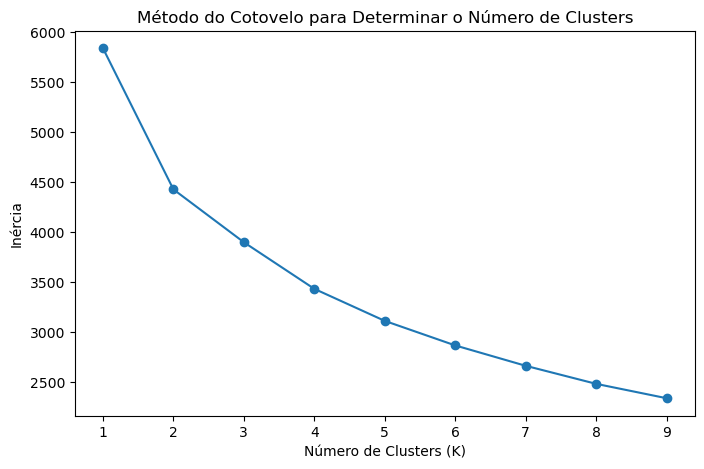

In [15]:
# Plot do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para Determinar o Número de Clusters")
plt.show()